In [25]:
#importer vos librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as DT
import time
import re
import pickle
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from stop_words import get_stop_words
from joblib import dump, load
import seaborn as sns

In [52]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [17]:
dataprice=pd.read_csv("DataCSV/price_availability.csv",sep=';')
datalisting=pd.read_csv("DataCSV/listings_final.csv",sep=';')

In [18]:
dataprice.head(10)

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2
5,20897010,2018-12-09,2018-09-26 15:10:09.000+0000,True,EUR,172,2
6,4290340,2018-09-04,2018-09-27 10:50:42.000+0000,True,EUR,67,15
7,4290340,2018-09-04,2018-09-27 06:06:28.000+0000,True,EUR,67,15
8,4290340,2018-09-04,2018-09-26 19:42:08.000+0000,True,EUR,67,15
9,24574634,2018-09-21,2018-09-27 10:48:47.000+0000,False,EUR,44,5


In [19]:
datalisting.head(10)

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90
5,5,2157481,"CENTRAL ET BIEN CONÇU,50m2+terrasse",entire_home,Paris,10e arrondissement,48.875863,2.372665,4,2,1,1.0,False,False,True,False,False,1.00,1.00
6,6,1140610,Petit atelier canal st Martin,entire_home,Paris,République,48.869362,2.368722,3,1,1,1.0,False,False,True,False,False,0.86,0.66
7,7,5662637,Sophisticated & Sunny Opulent 1BR *Opéra *4 Gu...,entire_home,Paris,Opéra - Grands Boulevards,48.872781,2.351549,2,2,1,1.0,False,False,True,True,False,0.92,0.85
8,8,5981388,Paris 16 - Elysées-Kléber-Trocadero /,entire_home,Paris,Passy,48.868952,2.289333,6,5,2,2.0,False,False,True,True,False,0.90,0.75
9,9,149534,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.40


In [20]:
print(" - - - Start Data Merging - - - ")
data = dataprice.groupby('listing_id')['local_price'].mean()
data_merge = pd.merge(data,datalisting, on='listing_id')
print(" - - - data merged - - - ")

 - - - Start Data Merging - - - 
 - - - data merged - - - 


In [21]:
data_merge

,listing_id,local_price,Unnamed: 0,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,12,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,13,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,19,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,9,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,28,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,28684174,725.175781,662,Chambre familiale vue jardin avec petit-déjeun...,private_room,Paris,Ternes,48.879223,2.292382,5,0,1,1.0,False,True,True,False,False,1.00,1.0
995,28709644,475.000000,745,LORD BYRON-SPACE& STYLE IN 8TH EME,entire_home,Paris,Champs-Elysées,48.872202,2.298349,4,2,1,1.0,False,True,True,False,False,1.00,1.0
996,28751412,117.000000,88,Malesherbes Monceau Monsen,entire_home,Paris,Monceau,48.880923,2.314568,2,1,0,1.0,False,True,True,False,False,1.00,1.0
997,28774896,156.397468,159,5 min to invalides and 10 min to eiffel tower,entire_home,Paris,Invalides - Ecole Militaire,48.852915,2.314519,2,1,1,1.0,False,True,True,False,False,1.00,1.0


In [22]:
print(" - - - Dropping Start - - - ")
data_merge.drop(['Unnamed: 0'],axis='columns',inplace=True)
print(" - - - Dropping Done - - - ")

 - - - Dropping Start - - - 
 - - - Dropping Done - - - 


In [23]:
data_merge

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,28684174,725.175781,Chambre familiale vue jardin avec petit-déjeun...,private_room,Paris,Ternes,48.879223,2.292382,5,0,1,1.0,False,True,True,False,False,1.00,1.0
995,28709644,475.000000,LORD BYRON-SPACE& STYLE IN 8TH EME,entire_home,Paris,Champs-Elysées,48.872202,2.298349,4,2,1,1.0,False,True,True,False,False,1.00,1.0
996,28751412,117.000000,Malesherbes Monceau Monsen,entire_home,Paris,Monceau,48.880923,2.314568,2,1,0,1.0,False,True,True,False,False,1.00,1.0
997,28774896,156.397468,5 min to invalides and 10 min to eiffel tower,entire_home,Paris,Invalides - Ecole Militaire,48.852915,2.314519,2,1,1,1.0,False,True,True,False,False,1.00,1.0


In [30]:
data_merge.isna().sum() / data_merge.shape[0] * 100

listing_id                  0.000000
local_price                 0.000000
name                        0.000000
type                        0.000000
city                        0.000000
neighborhood                6.506507
latitude                    0.000000
longitude                   0.000000
person_capacity             0.000000
beds                        0.000000
bedrooms                    0.000000
bathrooms                   0.000000
is_rebookable               0.000000
is_new_listing              0.000000
is_fully_refundable         0.000000
is_host_highly_rated        0.000000
is_business_travel_ready    0.000000
pricing_weekly_factor       0.000000
pricing_monthly_factor      0.000000
dtype: float64

Aprés le Merge et dropping colmun [Unamed:0] inutile , on aura 999 lignes avec 19 columns qu'on va utiliser dans l'analyse

In [32]:
data_merge.shape

(999, 19)

In [35]:
data_merge.dtypes

listing_id                    int64
local_price                 float64
name                         object
type                         object
city                         object
neighborhood                 object
latitude                    float64
longitude                   float64
person_capacity               int64
beds                          int64
bedrooms                      int64
bathrooms                   float64
is_rebookable                  bool
is_new_listing                 bool
is_fully_refundable            bool
is_host_highly_rated           bool
is_business_travel_ready       bool
pricing_weekly_factor       float64
pricing_monthly_factor      float64
dtype: object

In [36]:
data_merge.describe()

,listing_id,local_price,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,pricing_weekly_factor,pricing_monthly_factor
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.543276e+07,189.304613,48.864251,2.345202,3.669670,2.058058,1.326326,1.230230,0.942882,0.871809
std,9.305853e+06,184.425492,0.009824,0.031837,2.190568,1.500378,0.998806,0.524497,0.073776,0.162974
min,5.609300e+04,17.863724,48.844372,2.268992,1.000000,0.000000,0.000000,0.000000,0.600000,0.330000
25%,6.341818e+06,76.525248,48.856929,2.326608,2.000000,1.000000,1.000000,1.000000,0.900000,0.750000
50%,1.727835e+07,144.000000,48.864368,2.349152,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,2.378911e+07,230.372596,48.871906,2.366973,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000
max,2.879280e+07,1780.590674,48.882691,2.412700,16.000000,16.000000,6.000000,5.000000,1.000000,1.000000


## Diagramme de répartition des données (Type Gaussiennes)

(array([304., 251., 191.,  98.,  52.,  34.,  19.,   9.,  11.,   7.,   1.,
          5.,   3.,   7.,   1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.]),
 array([  17.86372361,   88.37280161,  158.88187961,  229.3909576 ,
         299.9000356 ,  370.4091136 ,  440.9181916 ,  511.4272696 ,
         581.9363476 ,  652.4454256 ,  722.9545036 ,  793.46358159,
         863.97265959,  934.48173759, 1004.99081559, 1075.49989359,
        1146.00897159, 1216.51804959, 1287.02712758, 1357.53620558,
        1428.04528358, 1498.55436158, 1569.06343958, 1639.57251758,
        1710.08159558, 1780.59067358]),
 <BarContainer object of 25 artists>)

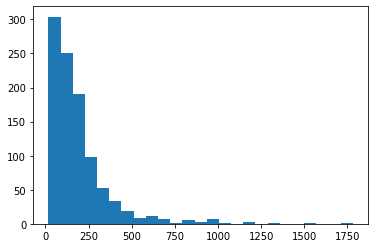

In [38]:
plt.hist(data_merge.local_price, bins = 25)

Commentaire sur Histogramme de données de local_price : 

Ce qu'on observe :-
- Les nombres de prix des appartement de 0 à 250 sont plus hauts que les autres prix
- il y a une grande totalité des appartements qui sont pas chéres et on peut faire plus d'études c'est qui définie ces prix là
- peut être la position geographique ou la capacité des personnes et la surface de l'appartement.

## Taux de données non nulles par rapport aux données Nulle

In [40]:
100 - data_merge.isna().sum() / data_merge.shape[0] * 100 

listing_id                  100.000000
local_price                 100.000000
name                        100.000000
type                        100.000000
city                        100.000000
neighborhood                 93.493493
latitude                    100.000000
longitude                   100.000000
person_capacity             100.000000
beds                        100.000000
bedrooms                    100.000000
bathrooms                   100.000000
is_rebookable               100.000000
is_new_listing              100.000000
is_fully_refundable         100.000000
is_host_highly_rated        100.000000
is_business_travel_ready    100.000000
pricing_weekly_factor       100.000000
pricing_monthly_factor      100.000000
dtype: float64

## Boîte De Moustache

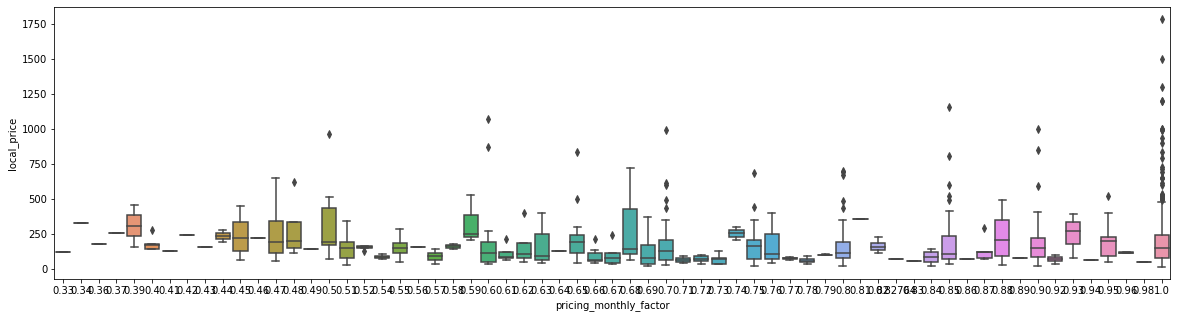

In [28]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='pricing_monthly_factor',y='local_price',data=data_merge);

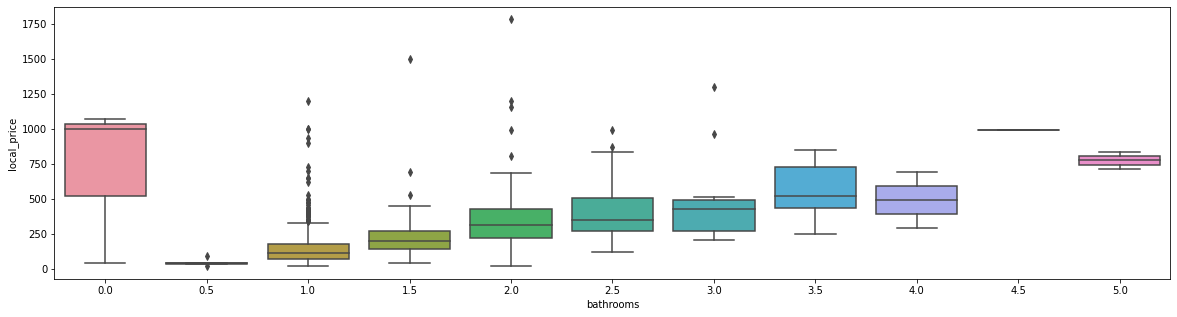

In [41]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='bathrooms',y='local_price',data=data_merge);

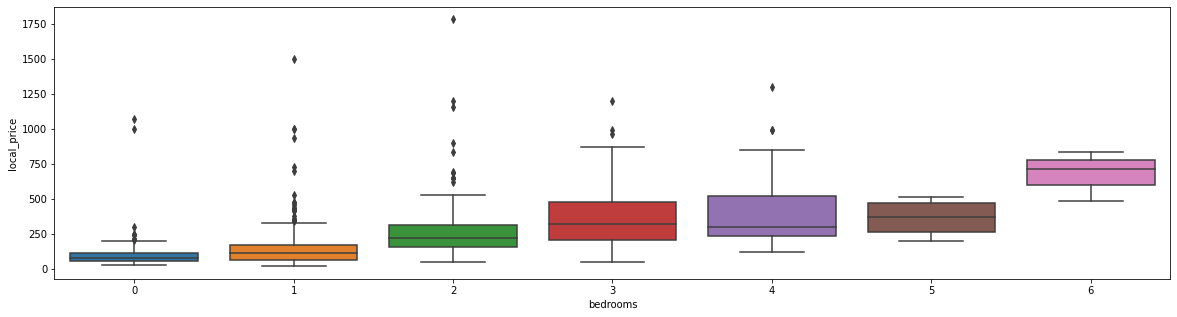

In [42]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='bedrooms',y='local_price',data=data_merge);

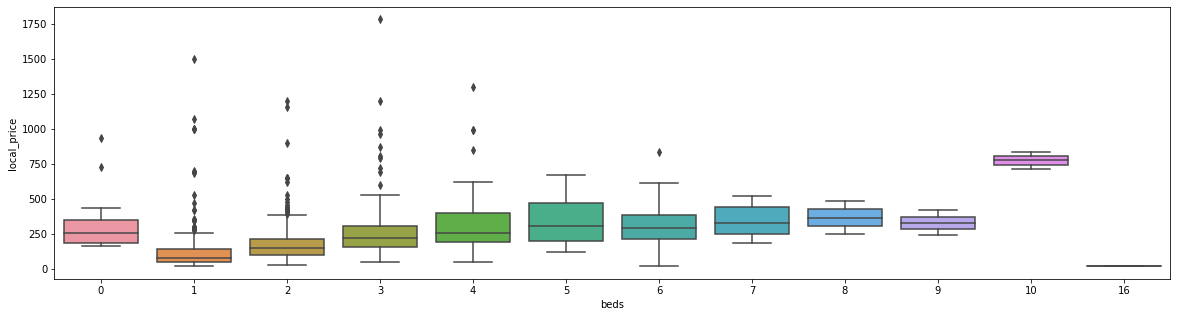

In [43]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='beds',y='local_price',data=data_merge);

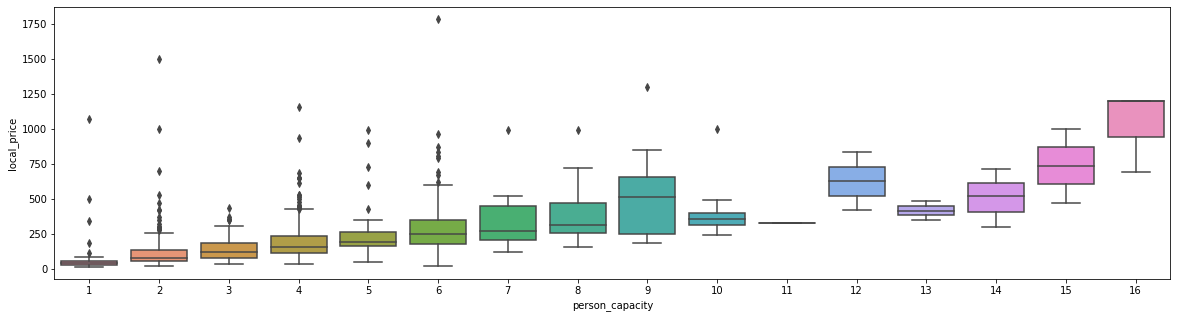

In [54]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='person_capacity',y='local_price',data=data_merge);

## Heatmap

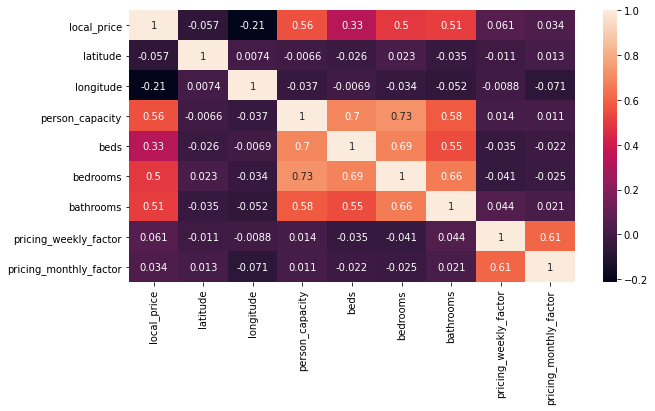

In [56]:
data_corr=pd.DataFrame(data_merge,columns=['local_price','latitude','longitude','person_capacity','beds','bedrooms','bathrooms','pricing_weekly_factor','pricing_monthly_factor'])

sns.heatmap(data_corr.corr(),annot=True)
plt.show()

Commentaire sur Heatmap : 

Si on regarde les beds par rapport aux autres parametres
- beds et person_capacity : 0.7
- beds et bedrooms : 0.69
ce qui confirme le raisonnement d'avoir les mêmes quantitées de lits avec autemps de chambres de sommeils ( bedrooms ) 